# <center> ODE Solving numerical methods

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tools import RK4

plt.style.use('classic')

In [102]:
class LinearFunc:

    def __init__(self, A: np.array):
        self.A = A
    
    def __call__(self, t, y):
        return self.A@y

In [171]:
def plots(t, y):
    fig, ax = plt.subplots(ncols=2, figsize=(11,5))

    ax[0].plot(y[:,0],y[:,1], c='r', linewidth=0.5, alpha=0.5)
    ax[1].plot(t,y[:,0], c='b', linewidth=0.5, alpha=0.5)
    ax[1].plot(t,y[:,1], c='g', linewidth=0.5, alpha=0.5)

    ax[0].set_xlabel('$x_1$', size=20)
    ax[0].set_ylabel('$x_2$', size=20)
    ax[0].set_title('Фазовый портрет', size=20)
    ax[1].set_ylabel('$x_1,~x_2$', size=20)
    ax[1].set_xlabel('$t$', size=20)
    ax[1].set_title('Траектории', size=20)

    plt.show()

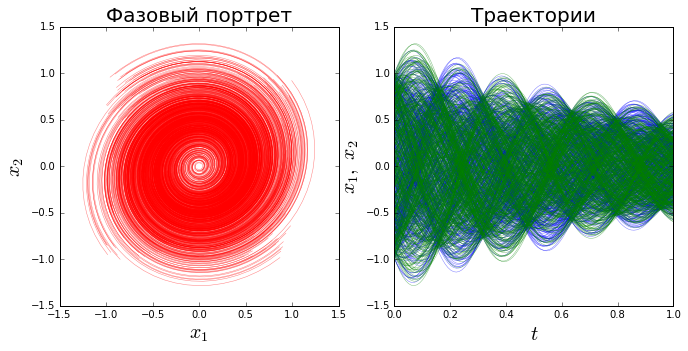

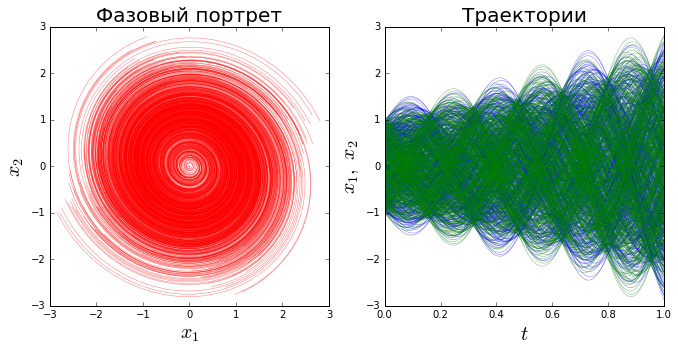

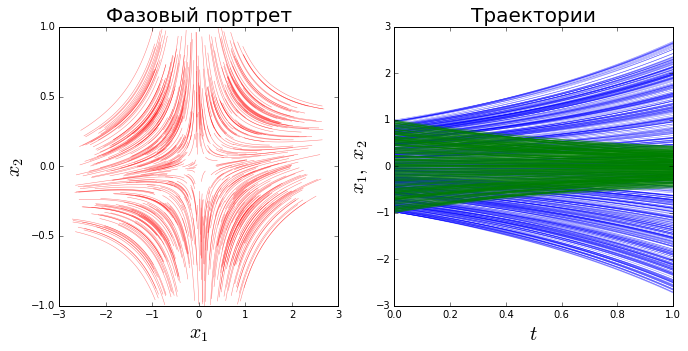

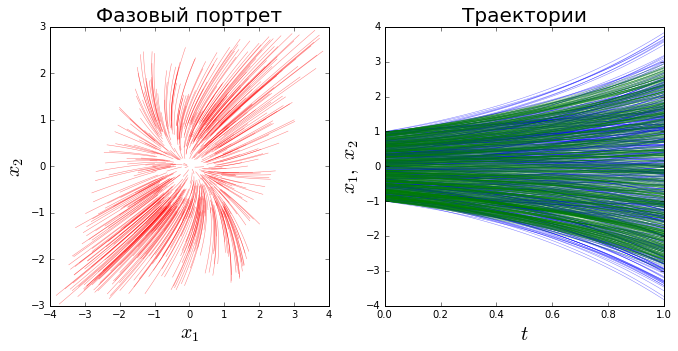

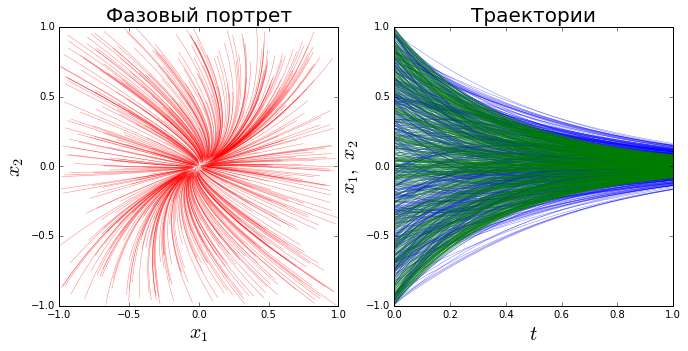

In [173]:
funcs = [LinearFunc(np.array([[-1.5, 10.0], [-10.0, -0.1]])),
         LinearFunc(np.array([[1.5, 10.0], [-10.0, 0.1]])),
         LinearFunc(np.array([[1.0, 0.1], [0.1, -1.]])), 
         LinearFunc(np.array([[1.0, 0.5], [0.1, 1.0]])), 
         LinearFunc(np.array([[-2.6,  1.3], [0.1, -2.6]]))]

for func in funcs:
    t0 = 0.
    y0 = np.random.uniform(-1,1,size=(2,500))
    solver = RK4(func, t0, y0)
    t, y = solver(1, 100)
    #print(np.linalg.eig(func.A)[0])
    plots(t,y)

In [448]:
class Lorenz:

    def __init__(self, s: float, r: float, b: float):
        self.s = s
        self.r = r
        self.b = b
    
    def __call__(self, t, y):
        res = np.zeros_like(y)
        res[0] = self.s*(y[1]-y[0])
        res[1] = self.r*y[0] - y[1] - y[0]*y[2]
        res[2] = y[0]*y[1] - self.b*y[2]
        return res

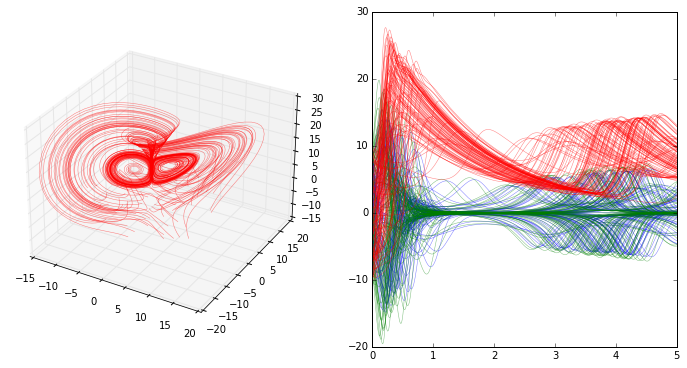

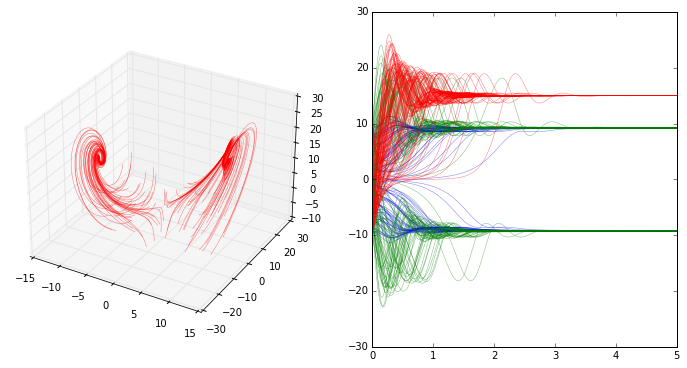

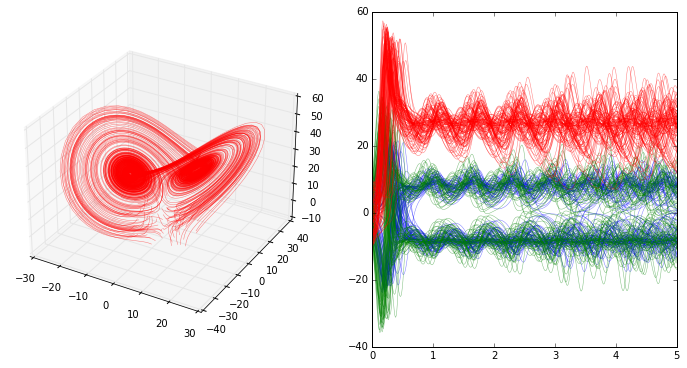

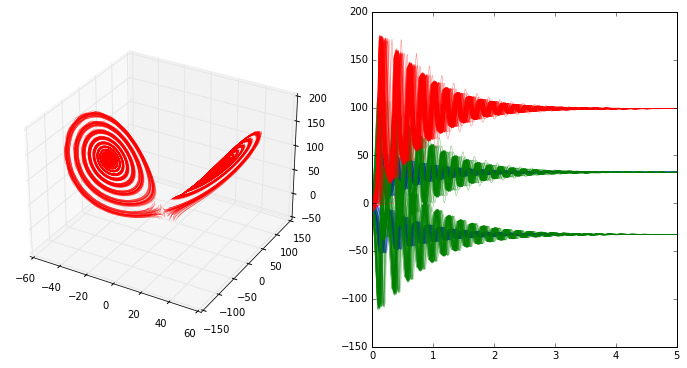

In [547]:
from matplotlib import cm

funcs = [Lorenz(10, 10, 0.667),
         Lorenz(1, 16, 5.667),
         Lorenz(10, 28, 2.667), 
         Lorenz(10, 100, 10.667)]

y0 = np.random.uniform(-10,10,size=(3,100))
t0 = 0.

for func in funcs:
    solver = RK4(func, t0, y0)
    t, y = solver(5, 500)

    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(1,2,1, projection='3d')
    ax1 = fig.add_subplot(1,2,2)

    for i in range(y.shape[-1]):
        ax.plot(y[:,0,i], y[:,1,i], y[:,2,i], linewidth=0.5, alpha=0.5, c='r')
    ax1.plot(t, y[:,0], c='b', linewidth=0.5, alpha=0.5)
    ax1.plot(t, y[:,1], c='g', linewidth=0.5, alpha=0.5)
    ax1.plot(t, y[:,2], c='r', linewidth=0.5, alpha=0.5)

    #ax = [ax1, ax2]
    #ax1.plot(y[:,0], y[:,1], y[:,2], lw=0.5, c='r')
    #ax1.set_xlabel('$x_1$', size=20)
    #ax1.set_ylabel('$x_2$', size=20)
    #ax1.set_zlabel('$x_3$', size=20)

    plt.show()